In [1]:
import numpy as np
import pandas as pd
from io import StringIO
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from IPython.display import display,HTML
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


In [2]:
#Reading the titanic data.
train= pd.read_csv(("C:\\Users\\kwind\Downloads\\train.csv") )
test= pd.read_csv(("C:\\Users\\kwind\\Downloads\\test.csv"))

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


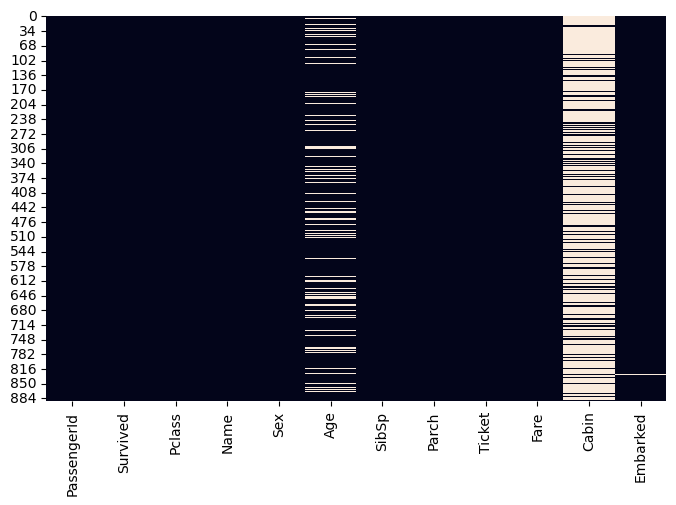

In [4]:
train.isnull().sum().sort_values(ascending=False)
# visualising missing data 
plt.figure(figsize=(8, 5))
sns.heatmap(train.isnull(), cbar=False)
plt.show()

In [5]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [6]:
round(train.isnull().sum() / len(train) * 100, 2).sort_values(ascending=False)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

In [7]:
mean_age=(train["Age"].mean()).round()
train['Age'].fillna(mean_age, inplace=True)
train['Age'] = train['Age'].round(0).astype(int)


In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# Drop Cabin column beacause it has more than 70% missing value
train= train.drop(['Cabin', axis= 1])
# Replacing missing values in "Age" column with median
mean_age=(train["Age"].mean()).round()
train['Age'].fillna(mean_age, inplace=True)
train['Age'] = train['Age'].round(0).astype(int)

# Replace missing values in "Embarked" column with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

train.isnull().sum().sort_values(ascending=False)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2692188799.py, line 2)

In [10]:
train.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)


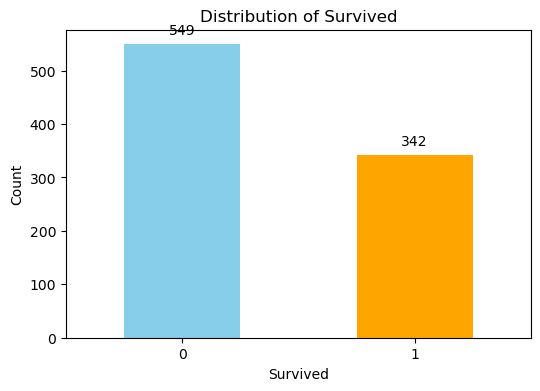

In [11]:

# Plot the distribution of 'Survived' column
plt.figure(figsize=(6, 4))

# Countplot for survival
ax = train['Survived'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])

plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')

# Display exact count values above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

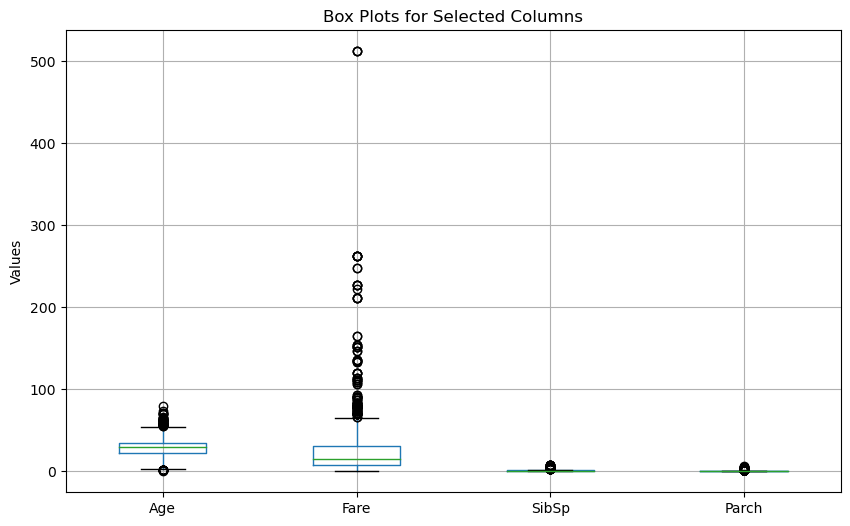

In [12]:
columns_to_plot = ['Age', 'Fare', 'SibSp', 'Parch']

# Create box plots for selected columns
plt.figure(figsize=(10, 6))
train[columns_to_plot].boxplot()
plt.title('Box Plots for Selected Columns')
plt.ylabel('Values')
plt.show()

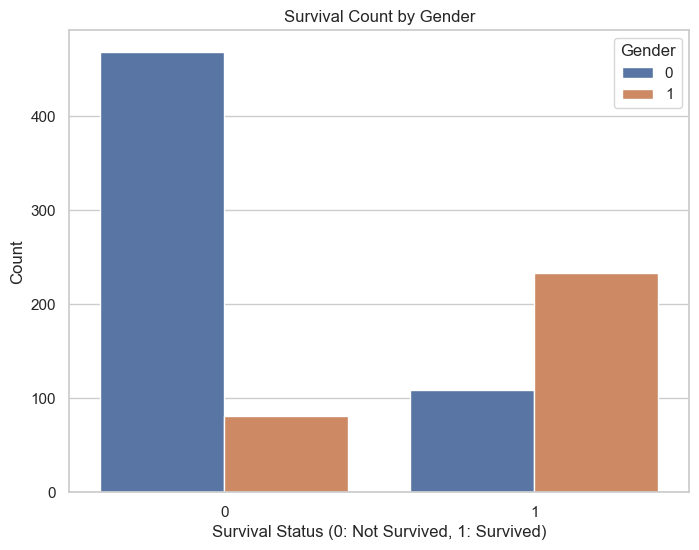

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Countplot for survival based on gender
sns.countplot(x='Survived', hue='Sex', data=train)

plt.title('Survival Count by Gender')
plt.xlabel('Survival Status (0: Not Survived, 1: Survived)')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.show()

In [14]:

x = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = train['Survived']
x.shape, y.shape

((891, 8), (891,))

In [18]:
train= train.drop
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape


AttributeError: 'function' object has no attribute 'drop'

In [17]:

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

ValueError: could not convert string to float: 'C124'

In [ ]:

model = RandomForestClassifier()
model.fit(x_train, y_train)


In [825]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x.columns)

y_pred_proba_rf = model.predict_proba(x_test_scaled)


ValueError: Shape of passed values is (179, 7), indices imply (179, 8)

In [745]:
y_pred_rf = model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

In [746]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.7206703910614525
Precision: 0.62
Recall: 0.8378378378378378
F1 Score: 0.7126436781609196

Confusion Matrix:
[[89 16]
 [19 55]]


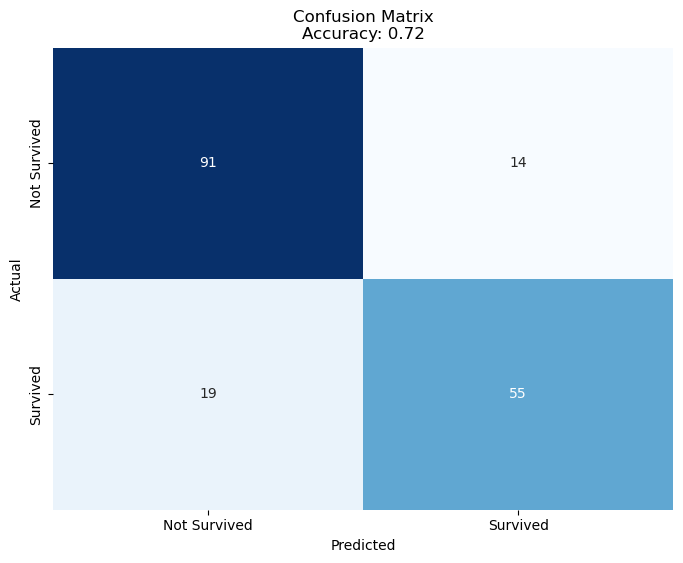

In [747]:
y_pred = model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [748]:
# performing the model using the logistic regression model

model2 = LogisticRegression(random_state=42)
model2.fit(x_train_scaled, y_train)



LogisticRegression(random_state=42)

In [749]:
y_pred_rf = model2.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

D:\New folder\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [750]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix2)


Accuracy: 0.7988826815642458
Confusion Matrix:
[[104   1]
 [ 62  12]]


D:\New folder\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


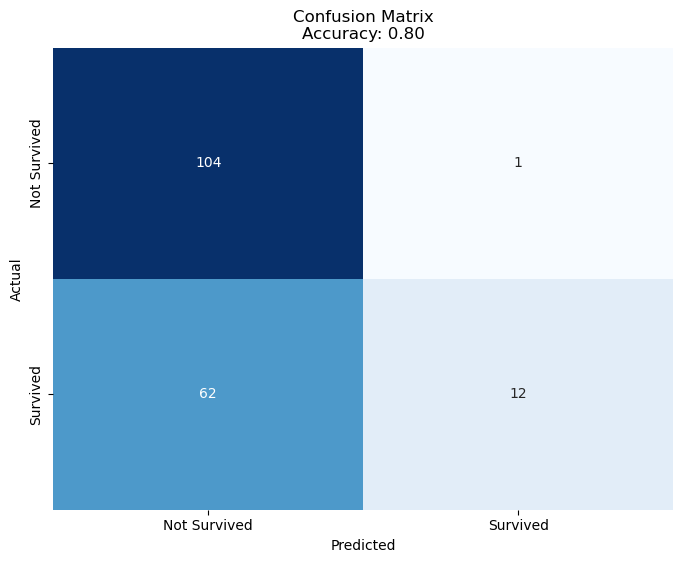

In [751]:
y_pred = model2.predict(x_test)


conf_matrix2 = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [752]:


test.shape

(418, 11)

In [753]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22,1,0,7.2500,0
1,1,1,38,1,0,71.2833,1
2,3,1,26,0,0,7.9250,0
3,1,1,35,1,0,53.1000,0
4,3,0,35,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27,0,0,13.0000,0
887,1,1,19,0,0,30.0000,0
888,3,1,30,1,2,23.4500,0
889,1,0,26,0,0,30.0000,1


In [754]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [755]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [756]:

# Replacing missing values in "Age" column with median
test['Age'].fillna(test['Age'].median(), inplace=True)

# Replacing missing values in "Fare" column with mode
test['Fare'].fillna(test['Fare'].mode()[0], inplace=True)

# Replace missing values in "Embarked" column with mode
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True) 

test.isnull().sum().sort_values(ascending=False)

Cabin          327
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [762]:
# Handling Categorical data
test.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [763]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [764]:
test_x = test.drop(columns =['PassengerId','Name','Ticket','Cabin'], axis=1)

In [765]:
test_pred = model.predict(test_x)
test_pred2 = model2.predict(test_x)

D:\New folder\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [766]:
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test_pred})
output.to_excel('C:\\Users\\kwind\\Downloads\\Output1.xlsx', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [767]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [768]:
output2 = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test_pred2})
output2.to_excel('C:\\Users\\kwind\\Downloads\\Output2.xlsx', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


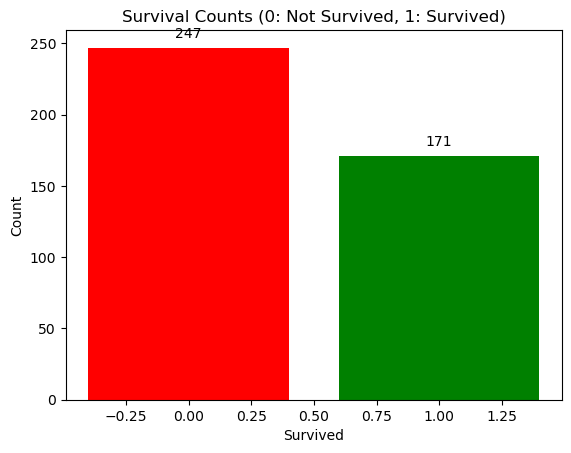

In [769]:
survived_counts = output['Survived'].value_counts()

# Plotting a bar graph
plt.bar(survived_counts.index, survived_counts.values, color=['red', 'green'])

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Counts (0: Not Survived, 1: Survived)')

# Displaying the count values on top of the bars
for index, value in enumerate(survived_counts.values):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

# Display the plot
plt.show()

In [770]:
output2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


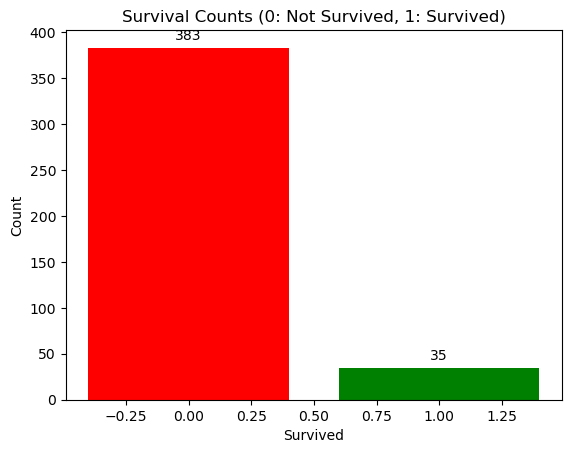

In [771]:
survived_counts = output2['Survived'].value_counts()

# Plotting a bar graph
plt.bar(survived_counts.index, survived_counts.values, color=['red', 'green'])

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Counts (0: Not Survived, 1: Survived)')

# Displaying the count values on top of the bars
for index, value in enumerate(survived_counts.values):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

# Display the plot
plt.show()